In [1]:
import csv
import requests
import sys
from datetime import datetime, timezone
from prometheus_api_client import PrometheusConnect

from prometheus_pandas import query

import numpy as np
import pandas as pd

In [2]:
#ugly keys, 100% width, diplay change only

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
prometheus_url = 'http://jmeyer-misc:9090'
timerange      = '60d'

#timerange      = '1h'

In [4]:
p = query.Prometheus(prometheus_url)
df = p.query('temperature['+timerange+']')

In [5]:
df.columns

Index(['temperature{app="\"1\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"1\"",exported_instance="GPU-Proto-Netbotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"2\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"3\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"4\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"5\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}',
       'temperature{app="\"6\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}'],
      dtype='object')

In [6]:
df.describe()

temperature{app="\"1\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}  \
count                                       2.235100e+04                                                               
mean                                       -2.880484e+04                                                               
std                                         2.487841e+06                                                               
min                                        -2.147484e+08                                                               
25%                                         1.840000e+01                                                               
50%                                         1.930000e+01                                                               
75%                                         1.990000e+01                                                               
max                                         2.400000e+01                                                               

       temperature{app="\"1\"",exported_instance="GPU-Proto-Netbotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}  \
count                                       2.235100e+04                                                                  
mean                                       -2.147484e+08                                                                  
std                                         9.000503e-05                                                                  
min                                        -2.147484e+08                                                                  
25%                                        -2.147484e+08                                                                  
50%                                        -2.147484e+08                                                                  
75%                                        -2.147484e+08                                                                  
max                                        -2.147484e+08                                                                  

       temperature{app="\"2\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}  \
count                                       2.235100e+04                                                               
mean                                       -2.880572e+04                                                               
std                                         2.487841e+06                                                               
min                                        -2.147484e+08                                                               
25%                                         1.660000e+01                                                               
50%                                         1.870000e+01                                                               
75%                                         2.030000e+01                                                               
max                                         2.500000e+01                                                               

       temperature{app="\"3\"",exported_instance="GPU-01-NetBotz",instance="jmeyer-misc:9224",job="zabbix_exporter"}  \
count                                       2.235100e+04                                                               
mean                                       -1.633171e+05                                                               
std                                         5.920391e+06                                                               
min                                        -2.147484e+08                                                               
25%                                         1.640000e+01                                                               
50%              

In [7]:
#rename columns for easier visualization
df.rename(columns={
    df.columns[0]: '1', 
    df.columns[1]: '2',
    df.columns[2]: '3',
    df.columns[3]: '4',
    df.columns[4]: '5',
    df.columns[5]: '6',
    df.columns[6]: '7',
}, inplace=True)

In [8]:
df.plot(kind='line')

<AxesSubplot:>

In [9]:
df = df[df > -100]

In [10]:
df

1   2     3     4     5     6     7
2023-03-21 00:00:32.104000092  20.3 NaN  20.8  18.4  19.9  27.0  16.2
2023-03-21 00:01:32.104000092  20.3 NaN  20.8  18.4  19.7  27.0  16.1
2023-03-21 00:02:32.104000092  20.3 NaN  20.8  18.2  19.7  27.0  16.1
2023-03-21 00:03:32.104000092  20.3 NaN  21.0  18.2  19.7  26.4  16.1
2023-03-21 00:04:32.104000092  19.9 NaN  21.0  18.2  19.7  26.4  16.1
...                             ...  ..   ...   ...   ...   ...   ...
2023-04-05 14:55:32.104000092  17.4 NaN  17.2  14.9  18.2  21.0  17.7
2023-04-05 14:56:32.104000092  17.9 NaN  17.6  15.7  18.2  21.0  17.7
2023-04-05 14:57:32.104000092  17.9 NaN  17.6  15.7  18.2  21.0  17.7
2023-04-05 14:58:32.104000092  17.9 NaN  17.6  15.7  18.2  21.0  17.7
2023-04-05 14:59:32.104000092  17.4 NaN  17.0  15.2  18.3  21.3  17.8

[22351 rows x 7 columns]

In [39]:
df.plot(kind='line',figsize=(40,10))

<AxesSubplot:>

[16.2 16.1 16.1 ... 17.7 17.7 17.8]


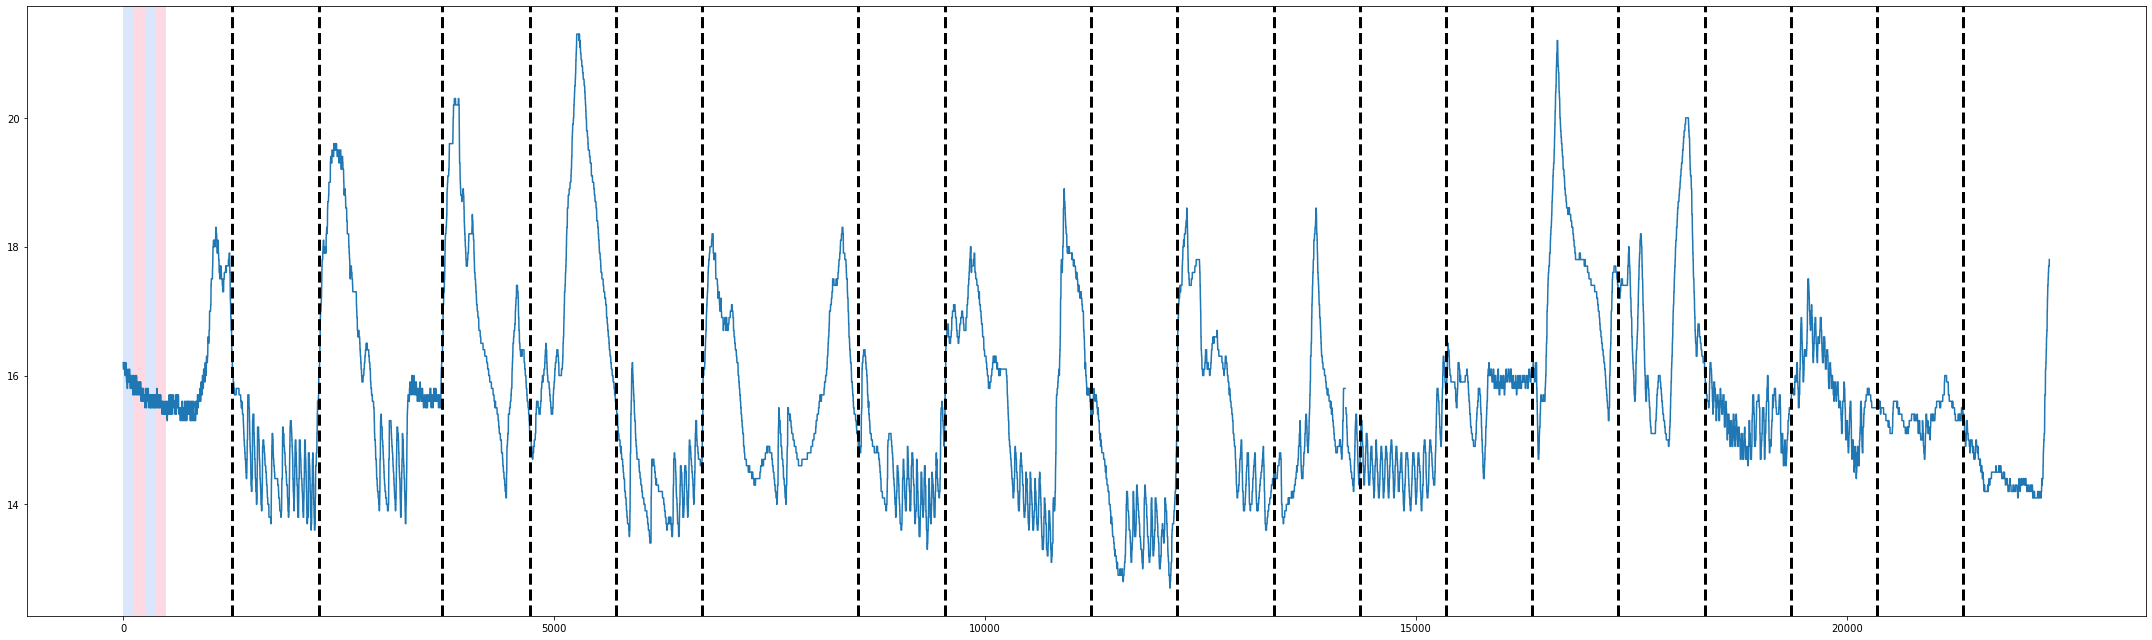

In [35]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
# n, dim = 500, 3
# n_bkps, sigma = 3, 1
# signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

signal = df['7'].values
print(signal)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=1000, jump=1).fit(signal)
my_bkps = algo.predict(pen=1)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(30, 9))
plt.show()

In [44]:
# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=500, jump=10).fit(signal)
my_bkps = algo.predict(pen=1)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(30, 9))
plt.show()

In [49]:
# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=5, jump=40).fit(signal)
my_bkps = algo.predict(pen=1)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(30, 9))
plt.show()

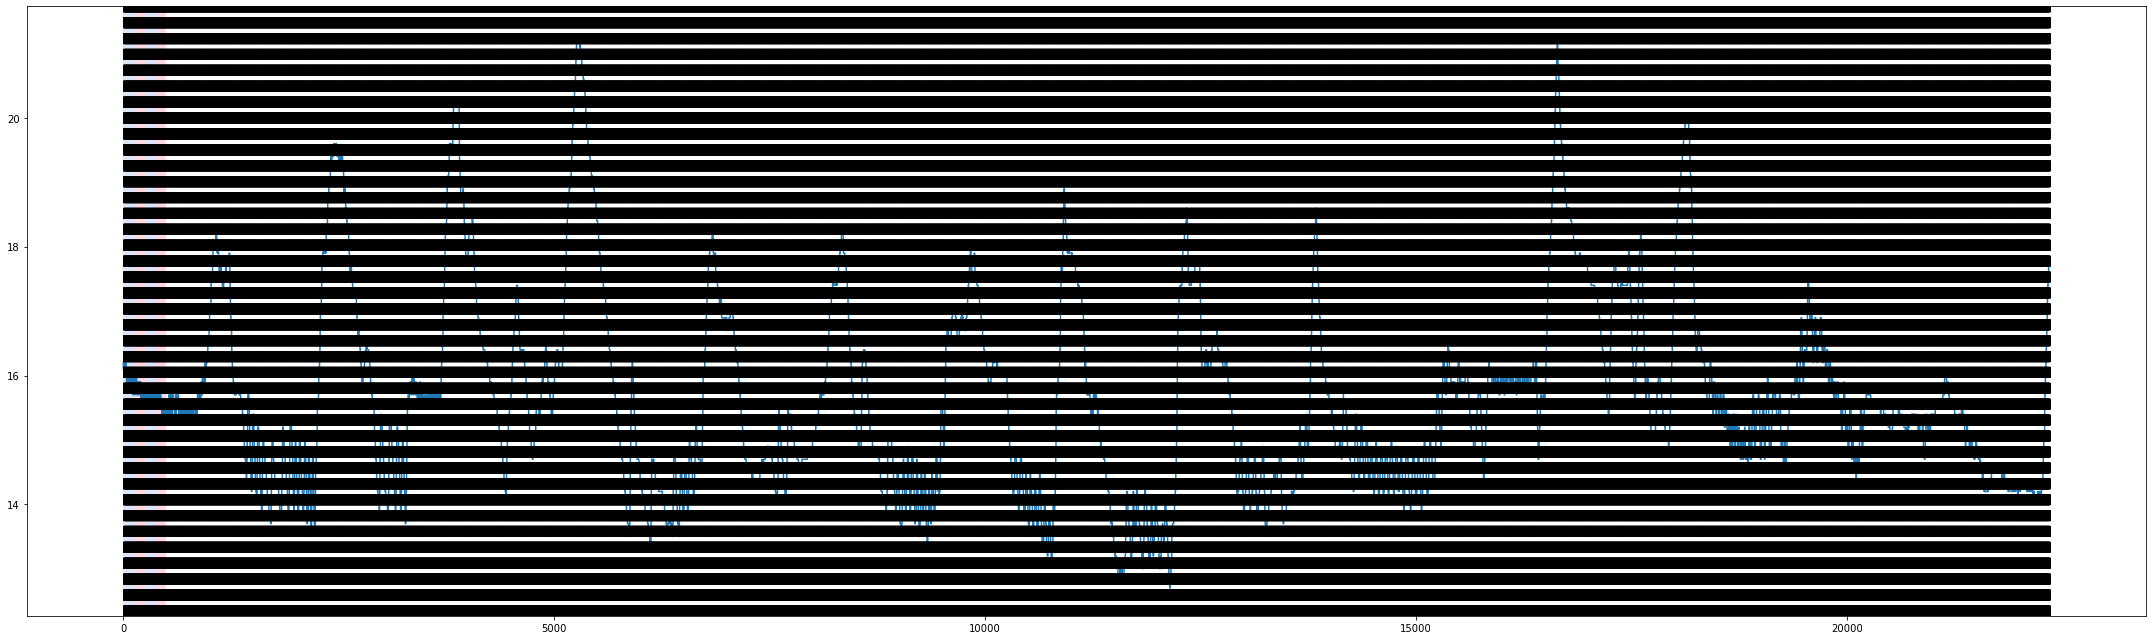

In [54]:
# change point detection, radial basis func
model = "rbf" 
algo = rpt.Pelt(model=model).fit(signal)
my_bkps = algo.predict(pen=10)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(30, 9))
plt.show()

[16.2 16.1 16.1 ... 17.7 17.7 17.8]


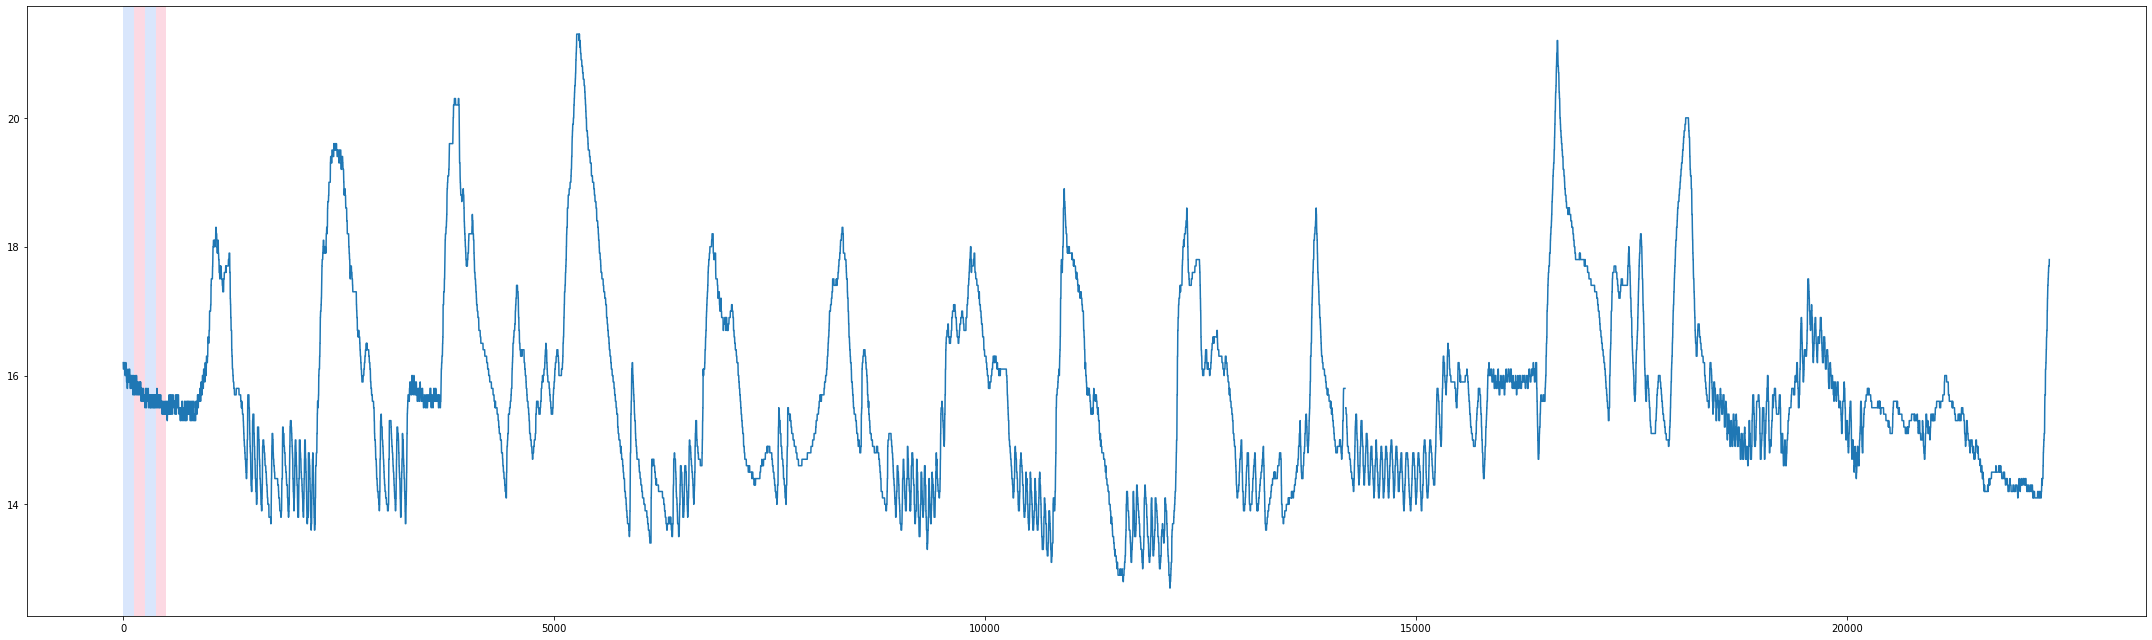

In [73]:
signal = df['7'].values
print(signal)

# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Window(model=model, width=5).fit(signal)
my_bkps = algo.predict(pen=1)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(30, 9))
plt.show()

In [1]:


# Perform Fourier analysis
fft_signal = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), .0008)
fft_signal_abs = np.abs(fft_signal)

# Plot the Fourier spectrum
plt.figure(figsize=(30, 6))
plt.plot(freqs, fft_signal_abs)
# plt.xlim(0, fs/2)
plt.title('Fourier spectrum of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

NameError: name 'np' is not defined